In [40]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import scipy.stats as st
from scipy.stats import boxcox
from scipy import stats

## Question 1

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/dipalira/Melbourne-Housing-Data-Kaggle/master/Data/Melbourne_housing_FULL.csv')
df

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,68 Studley St,2,h,NaN,SS,Jellis,3/09/2016,2.5,3067.0,...,1.0,1.0,126.0,NaN,NaN,Yarra City Council,-37.80140,144.99580,Northern Metropolitan,4019.0
1,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,...,1.0,1.0,202.0,NaN,NaN,Yarra City Council,-37.79960,144.99840,Northern Metropolitan,4019.0
2,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,...,1.0,0.0,156.0,79.0,1900.0,Yarra City Council,-37.80790,144.99340,Northern Metropolitan,4019.0
3,Abbotsford,18/659 Victoria St,3,u,NaN,VB,Rounds,4/02/2016,2.5,3067.0,...,2.0,1.0,0.0,NaN,NaN,Yarra City Council,-37.81140,145.01160,Northern Metropolitan,4019.0
4,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,...,2.0,0.0,134.0,150.0,1900.0,Yarra City Council,-37.80930,144.99440,Northern Metropolitan,4019.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34852,Yarraville,13 Burns St,4,h,1480000.0,PI,Jas,24/02/2018,6.3,3013.0,...,1.0,3.0,593.0,NaN,NaN,Maribyrnong City Council,-37.81053,144.88467,Western Metropolitan,6543.0
34853,Yarraville,29A Murray St,2,h,888000.0,SP,Sweeney,24/02/2018,6.3,3013.0,...,2.0,1.0,98.0,104.0,2018.0,Maribyrnong City Council,-37.81551,144.88826,Western Metropolitan,6543.0
34854,Yarraville,147A Severn St,2,t,705000.0,S,Jas,24/02/2018,6.3,3013.0,...,1.0,2.0,220.0,120.0,2000.0,Maribyrnong City Council,-37.82286,144.87856,Western Metropolitan,6543.0
34855,Yarraville,12/37 Stephen St,3,h,1140000.0,SP,hockingstuart,24/02/2018,6.3,3013.0,...,NaN,NaN,NaN,NaN,NaN,Maribyrnong City Council,NaN,NaN,Western Metropolitan,6543.0


In [57]:
df.columns

Index(['Suburb', 'Address', 'Rooms', 'Type', 'Price', 'Method', 'SellerG',
       'Date', 'Distance', 'Postcode', 'Bedroom2', 'Bathroom', 'Car',
       'Landsize', 'BuildingArea', 'YearBuilt', 'CouncilArea', 'Lattitude',
       'Longtitude', 'Regionname', 'Propertycount'],
      dtype='object')

In [14]:
# Eliminar las filas donde 'Price' es null y convertir 'Price' a int
df = df.dropna(subset=['Price'])
df['Price'] = df['Price'].astype(int)

df


C:\Users\bruno\AppData\Local\Temp\ipykernel_22308\3503296576.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Price'] = df['Price'].astype(int)


,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
1,Abbotsford,85 Turner St,2,h,1480000,S,Biggin,3/12/2016,2.5,3067.0,...,1.0,1.0,202.0,NaN,NaN,Yarra City Council,-37.79960,144.99840,Northern Metropolitan,4019.0
2,Abbotsford,25 Bloomburg St,2,h,1035000,S,Biggin,4/02/2016,2.5,3067.0,...,1.0,0.0,156.0,79.0,1900.0,Yarra City Council,-37.80790,144.99340,Northern Metropolitan,4019.0
4,Abbotsford,5 Charles St,3,h,1465000,SP,Biggin,4/03/2017,2.5,3067.0,...,2.0,0.0,134.0,150.0,1900.0,Yarra City Council,-37.80930,144.99440,Northern Metropolitan,4019.0
5,Abbotsford,40 Federation La,3,h,850000,PI,Biggin,4/03/2017,2.5,3067.0,...,2.0,1.0,94.0,NaN,NaN,Yarra City Council,-37.79690,144.99690,Northern Metropolitan,4019.0
6,Abbotsford,55a Park St,4,h,1600000,VB,Nelson,4/06/2016,2.5,3067.0,...,1.0,2.0,120.0,142.0,2014.0,Yarra City Council,-37.80720,144.99410,Northern Metropolitan,4019.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34852,Yarraville,13 Burns St,4,h,1480000,PI,Jas,24/02/2018,6.3,3013.0,...,1.0,3.0,593.0,NaN,NaN,Maribyrnong City Council,-37.81053,144.88467,Western Metropolitan,6543.0
34853,Yarraville,29A Murray St,2,h,888000,SP,Sweeney,24/02/2018,6.3,3013.0,...,2.0,1.0,98.0,104.0,2018.0,Maribyrnong City Council,-37.81551,144.88826,Western Metropolitan,6543.0
34854,Yarraville,147A Severn St,2,t,705000,S,Jas,24/02/2018,6.3,3013.0,...,1.0,2.0,220.0,120.0,2000.0,Maribyrnong City Council,-37.82286,144.87856,Western Metropolitan,6543.0
34855,Yarraville,12/37 Stephen St,3,h,1140000,SP,hockingstuart,24/02/2018,6.3,3013.0,...,NaN,NaN,NaN,NaN,NaN,Maribyrnong City Council,NaN,NaN,Western Metropolitan,6543.0


In [5]:
price = df['Price'].dropna().astype(int)
price

1        1480000
2        1035000
4        1465000
5         850000
6        1600000
          ...   
34852    1480000
34853     888000
34854     705000
34855    1140000
34856    1020000
Name: Price, Length: 27247, dtype: int32

In [7]:
# loss of the data
100 - (27_247 / 34_857) * 100

21.83205668875692

## Question 2

<Axes: ylabel='count'>

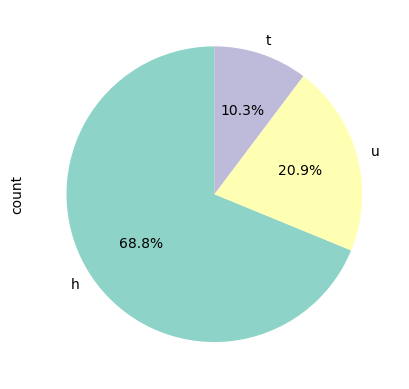

In [9]:
df['Type'].value_counts().plot.pie(autopct='%1.1f%%', startangle=90, colors=sns.color_palette("Set3"))   # count of each type of house

## Question 3

C:\Users\bruno\AppData\Local\Temp\ipykernel_22308\885729310.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='Type', palette="Set3")


<Axes: xlabel='Type', ylabel='count'>

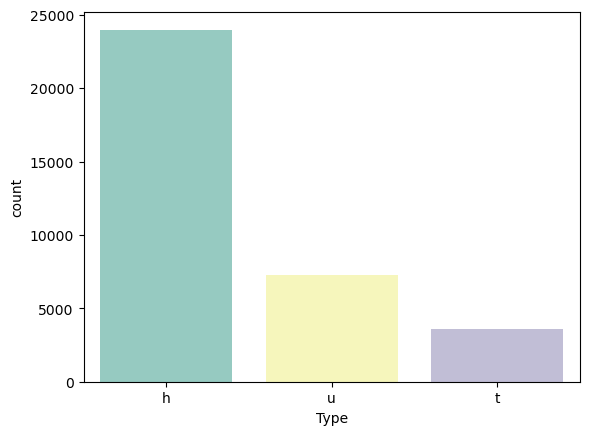

In [10]:
sns.countplot(data=df, x='Type', palette="Set3")

## Question 4

In [15]:
correlation = df['Price'].corr(df['Rooms'])
correlation

0.4652383451075974

<Axes: xlabel='Rooms', ylabel='Price'>

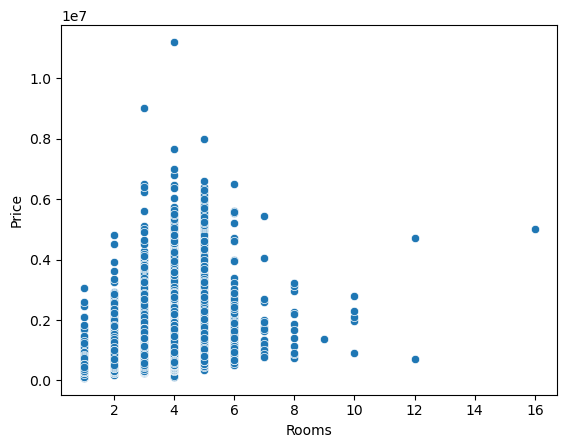

In [17]:
# Plotting a scatter plot to visualize the relationship between 'Price' and 'Rooms'
sns.scatterplot(data=df, x='Rooms', y='Price')

## Question 5

In [18]:
correlation = df['Price'].corr(df['Rooms'], method='spearman')
correlation

0.5042971590926004

## Question 6

In [59]:
correlation = df['Price'].corr(df['Distance'], method='spearman')
correlation

-0.18809341092744206

<Axes: xlabel='Rooms', ylabel='Distance'>

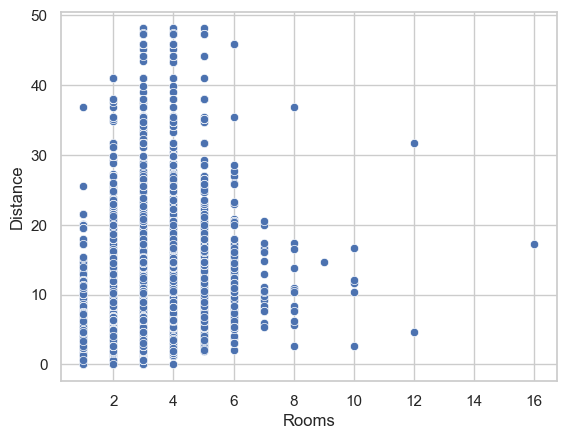

In [60]:
# Plotting a scatter plot to visualize the relationship between 'Price' and 'Distance'
sns.scatterplot(data=df, x='Rooms', y='Distance')

## Question 7

In [19]:
correlation = df['Price'].corr(df['Landsize'], method='spearman')
correlation

0.27661206258697724

In [21]:
correlation = df['Price'].corr(df['Landsize'])
correlation

0.03274836524947044

<Axes: xlabel='Rooms', ylabel='Landsize'>

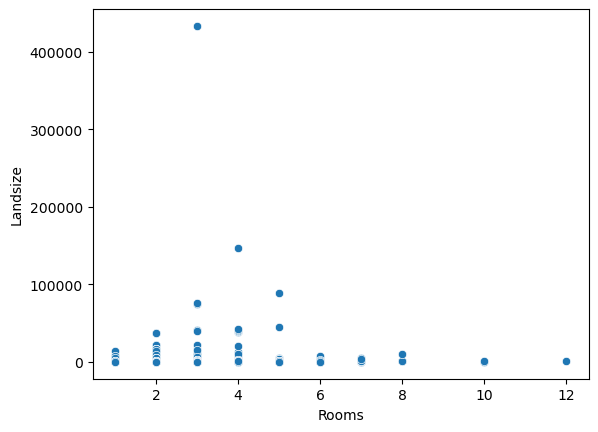

In [20]:
# Plotting a scatter plot to visualize the relationship between 'Price' and 'Landsize'
sns.scatterplot(data=df, x='Rooms', y='Landsize')

## Question 8

In [27]:
correlation = df[df['Landsize'] <= df['Landsize'].quantile(0.7)]['Price'].corr(df[df['Landsize'] <= df['Landsize'].quantile(0.7)]['Landsize'], method='spearman')
correlation

0.26090446643865306

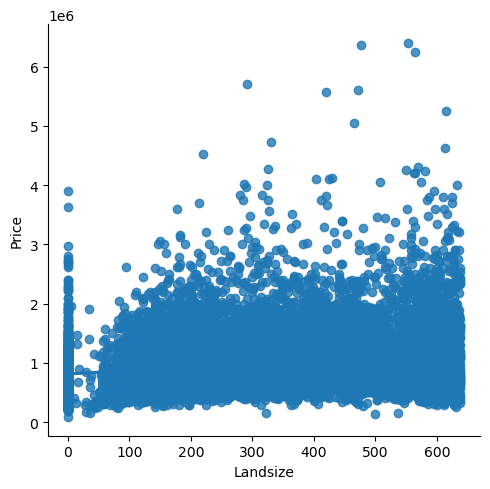

In [26]:
sns.lmplot(data=df[df['Landsize'] <= df['Landsize'].quantile(0.7)],
            x='Landsize',
            y='Price')


In [28]:
correlation = df[df['Landsize'] <= df['Landsize'].quantile(0.5)]['Price'].corr(df[df['Landsize'] <= df['Landsize'].quantile(0.5)]['Landsize'], method='spearman')
correlation

0.39318248432497904

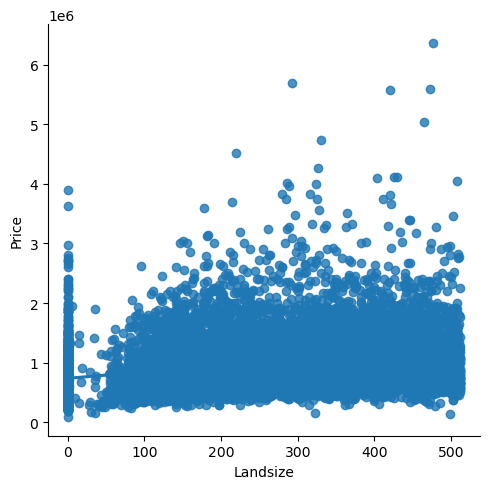

In [29]:
sns.lmplot(data=df[df['Landsize'] <= df['Landsize'].quantile(0.5)],
            x='Landsize',
            y='Price')

In [31]:
correlation = df[df['Landsize'] <= df['Landsize'].quantile(0.25)]['Price'].corr(df[df['Landsize'] <= df['Landsize'].quantile(0.25)]['Landsize'], method='spearman')
correlation

0.43848361918787493

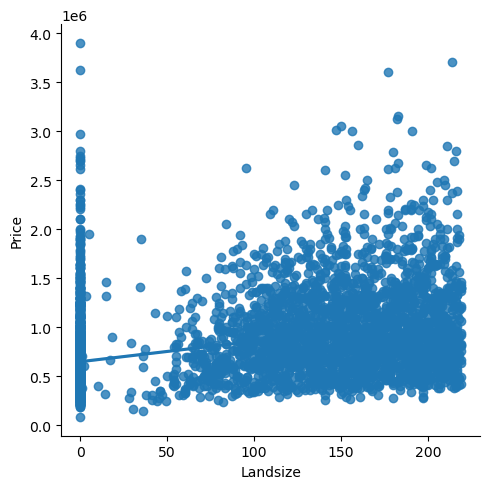

In [30]:
sns.lmplot(data=df[df['Landsize'] <= df['Landsize'].quantile(0.25)],
            x='Landsize',
            y='Price')

## Question 9

In [32]:
def tukeys_test_outliers(data):
    Q1 = data.quantile(0.25)
    Q3 = data.quantile(0.75)
    IQR = Q3 - Q1
    
    # Define bounds for the outliers
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    # Identify the outliers
    outliers = data[(data < lower_bound) | (data > upper_bound)]
    
    return outliers

In [38]:
(len(tukeys_test_outliers(df['Price'])) / 27_247) * 100

4.690424633904651

## Question 10

((array([-4.05155602, -3.83907604, -3.72296122, ...,  3.72296122,
          3.83907604,  4.05155602]),
  array([   85000,   112000,   121000, ...,  8000000,  9000000, 11200000])),
 (573652.4641138696, 1050173.3449554082, 0.8941694051312765))

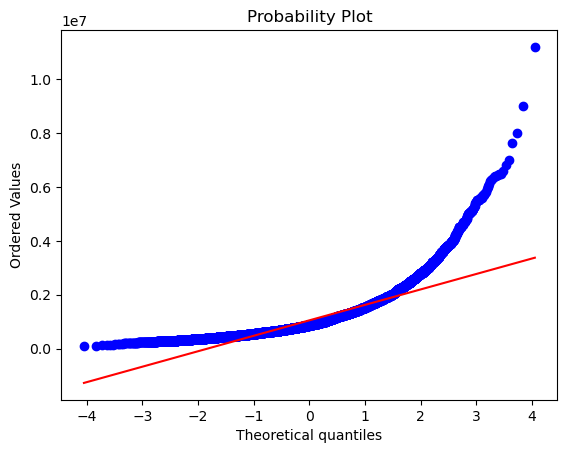

In [41]:
stats.probplot(price, plot=plt) # Q-Q plot

<Axes: xlabel='Price', ylabel='Count'>

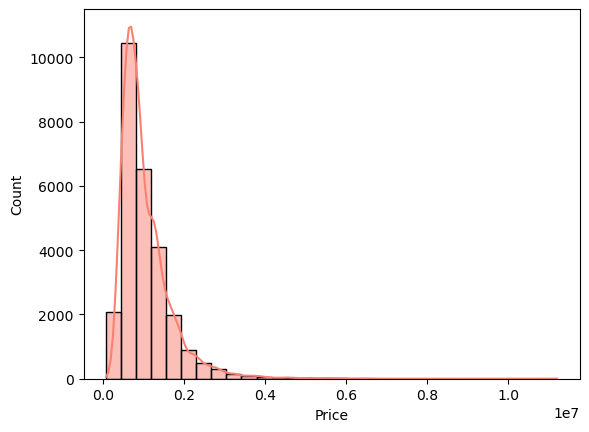

In [42]:
sns.histplot(price, kde=True, bins=30, color="salmon") # Histogram

In [43]:
skewness_price = price.skew()
kurtosis_price = price.kurtosis()

skewness_price, kurtosis_price # Skewness and kurtosis of 'Price'. Right-skewed, kurtosis > 3

(2.5889693410528594, 13.097200515556374)

## Question 11

In [44]:
standardized_saleprice = (price - price.mean()) / price.std()
ks_test_statistic, ks_p_value = stats.kstest(standardized_saleprice, 'norm')

ks_test_statistic, ks_p_value

(0.13751284953784154, 0.0)

In [49]:
Q1 = price.quantile(0.25)
Q3 = price.quantile(0.75)
IQR = Q3 - Q1
    
# Define bounds for the outliers

upper_bound = Q3 + 1.5 * IQR
upper_bound

price_without_outliers = price[price < upper_bound]
price_without_outliers

1        1480000
2        1035000
4        1465000
5         850000
6        1600000
          ...   
34852    1480000
34853     888000
34854     705000
34855    1140000
34856    1020000
Name: Price, Length: 25963, dtype: int32

In [50]:
standardized_saleprice = (price_without_outliers - price_without_outliers.mean()) / price_without_outliers.std()
ks_test_statistic, ks_p_value = stats.kstest(standardized_saleprice, 'norm')

ks_test_statistic, ks_p_value

(0.10247315449750244, 8.192302080967236e-238)

## Question 12

C:\Users\bruno\AppData\Local\Temp\ipykernel_22308\1238894975.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Type', y='Price', palette="coolwarm")


<Axes: xlabel='Type', ylabel='Price'>

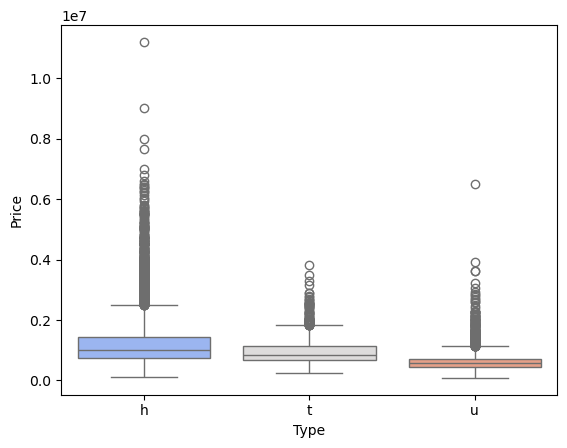

In [51]:
sns.boxplot(data=df, x='Type', y='Price', palette="coolwarm")

## Question 13

C:\Users\bruno\AppData\Local\Temp\ipykernel_22308\1401233387.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df, x='Regionname', y='Price', palette="coolwarm")


<Axes: xlabel='Regionname', ylabel='Price'>

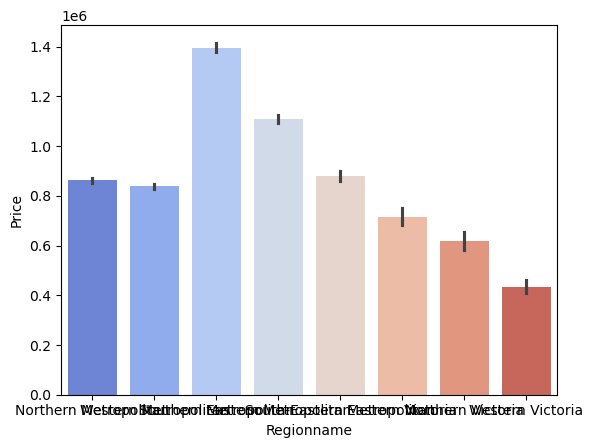

In [52]:
sns.barplot(data=df, x='Regionname', y='Price', palette="coolwarm")

C:\Users\bruno\AppData\Local\Temp\ipykernel_22308\3172542998.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df, x='Price', y='Regionname', palette="coolwarm")


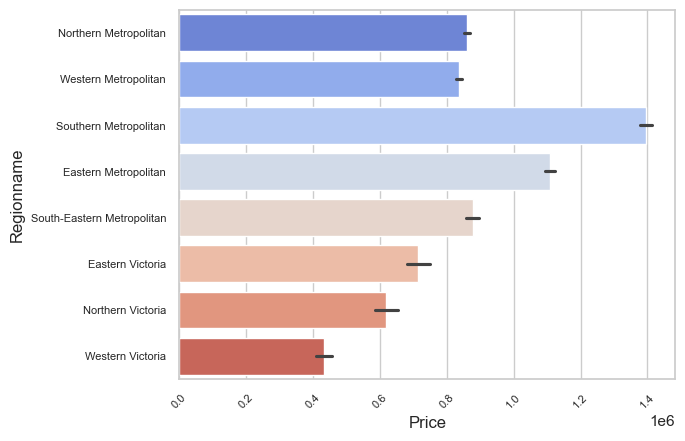

In [53]:
sns.set_theme(style="whitegrid")  # Configuración opcional para mejorar el diseño

# Crear el gráfico con barras horizontales
sns.barplot(data=df, x='Price', y='Regionname', palette="coolwarm")

# Ajustar los títulos de las etiquetas de los ejes (inclinación y tamaño de la letra)
plt.xticks(rotation=45, fontsize=8)  # Eje X inclinado y letra pequeña
plt.yticks(fontsize=8)  # Eje Y con letra pequeña

# Mostrar el gráfico
plt.show()

### Question 14

In [54]:
# Generating a crosstab for 'Regionname' and 'Price'
crosstab_result = pd.crosstab(df['Regionname'], df['Price'])

crosstab_result

Price,85000,112000,121000,131000,145000,160000,170000,185000,190000,200000,...,6400000,6460000,6500000,6600000,6800000,7000000,7650000,8000000,9000000,11200000
Regionname,,,,,,,,,,,,,,,,,,,,,
Eastern Metropolitan,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Eastern Victoria,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Northern Metropolitan,0,0,1,0,1,0,1,0,0,0,...,0,0,1,0,0,0,0,0,0,0
Northern Victoria,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
South-Eastern Metropolitan,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
Southern Metropolitan,0,1,0,1,0,1,0,0,0,0,...,2,1,1,1,1,1,1,1,0,1
Western Metropolitan,1,0,0,0,1,0,1,2,1,2,...,0,0,0,0,0,0,0,0,0,0
Western Victoria,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [55]:
from scipy.stats import chi2_contingency

# Chi-square test for 'MSZoning' and 'SaleCondition'
chi2_statistic, chi2_p_value, _, _ = chi2_contingency(crosstab_result)

chi2_statistic, chi2_p_value

(25658.719637573868, 1.804092622742568e-144)

In [56]:
from scipy.stats.contingency import association

# Computing the association between variables in 'crosstab_result' using the "cramer" method
association(crosstab_result, method="cramer")

0.3668031316595495

## Question 15

C:\Users\bruno\AppData\Local\Temp\ipykernel_22308\594466069.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(data=df, x='Date', y='Price', ci=None)


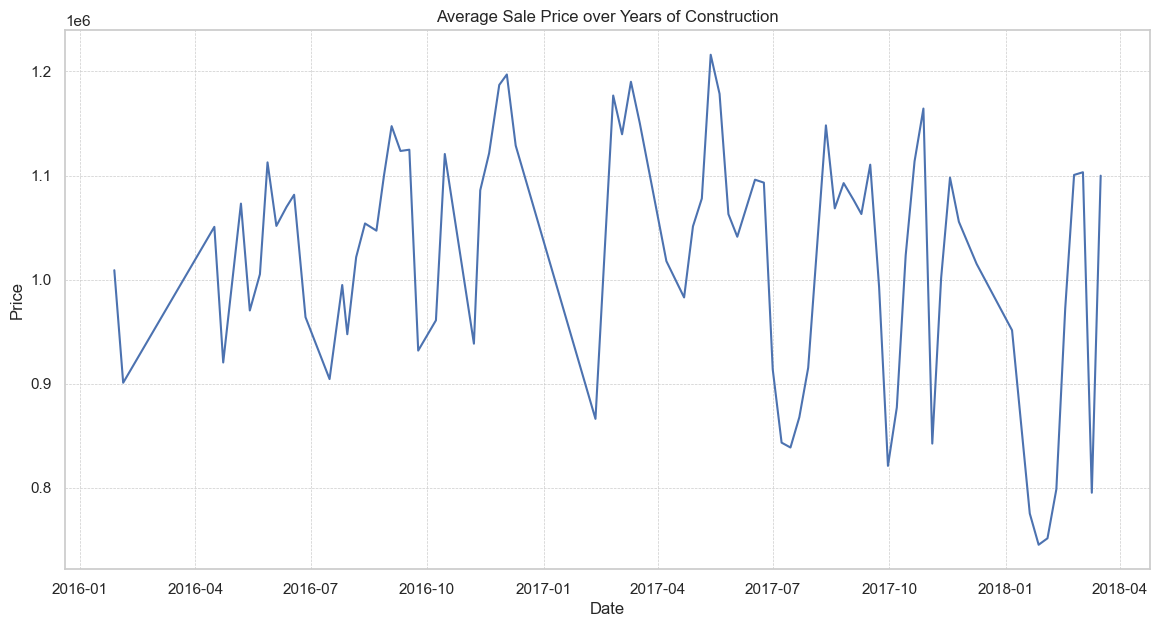

In [61]:
plt.figure(figsize=(14, 7))
sns.lineplot(data=df, x='Date', y='Price', ci=None)
plt.title('Average Sale Price over Years of Construction')
plt.grid(True, which='both', linestyle='--', linewidth=0.5)

## Question 16

C:\Users\bruno\AppData\Local\Temp\ipykernel_22308\663466942.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Date'] = pd.to_datetime(df['Date'], format='%d/%m/%Y')  # Convertir la columna a formato datetime
C:\Users\bruno\AppData\Local\Temp\ipykernel_22308\663466942.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Month'] = df['Date'].dt.month  # Extraer el mes
C:\Users\bruno\AppData\Local\Temp\ipykernel_22308\663466942.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is depre

El mes con más ventas es: 11, con 3408 ventas.


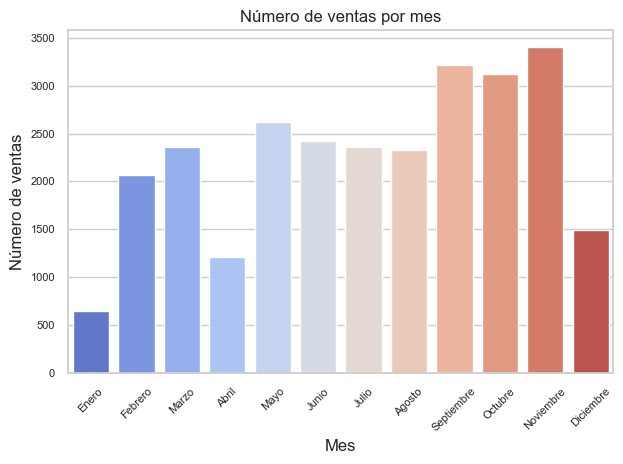

In [58]:
# Supongamos que tu DataFrame se llama 'df' y la columna de fechas se llama 'Date'
df['Date'] = pd.to_datetime(df['Date'], format='%d/%m/%Y')  # Convertir la columna a formato datetime
df['Month'] = df['Date'].dt.month  # Extraer el mes

# Contar el número de ventas por mes
sales_per_month = df['Month'].value_counts().sort_index()

# Encontrar el mes con más ventas
max_sales_month = sales_per_month.idxmax()
max_sales = sales_per_month.max()

print(f"El mes con más ventas es: {max_sales_month}, con {max_sales} ventas.")

# Crear un gráfico de barras
sns.barplot(x=sales_per_month.index, y=sales_per_month.values, palette="coolwarm")
plt.title("Número de ventas por mes")
plt.xlabel("Mes")
plt.ylabel("Número de ventas")
plt.xticks(range(12), [
    'Enero', 'Febrero', 'Marzo', 'Abril', 'Mayo', 'Junio', 
    'Julio', 'Agosto', 'Septiembre', 'Octubre', 'Noviembre', 'Diciembre'], 
    rotation=45, fontsize=8)
plt.yticks(fontsize=8)

# Mostrar el gráfico
plt.tight_layout()
plt.show()
